# Course project - Credit risk customers classification

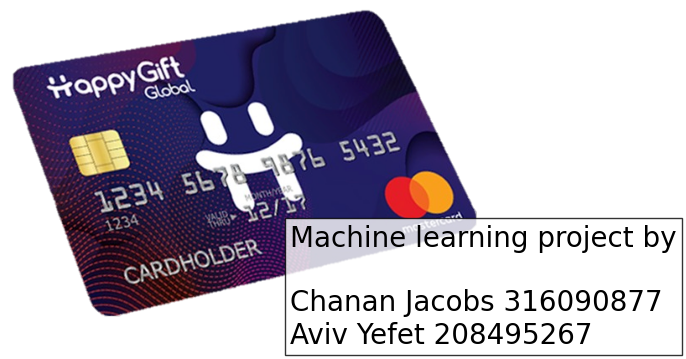

In [1]:
# Load the image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('creditCard.png')
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 4))
# Display the image
ax.imshow(img)
ax.axis('off')

# Add text to the plot
ax.text(0.6, 0.1, 'Machine learning project by\n\nChanan Jacobs 316090877\nAviv Yefet 208495267',
        fontsize=20, color='black', ha='left', va='center',
        transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

### import 

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
from pandas import Series,DataFrame
%matplotlib inline
sns.set_style('whitegrid')
import matplotlib.ticker as mtick

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score



### Load dataset

In [3]:
creditData = pd.read_csv('credit_customers.csv',encoding='UTF-8')

In [4]:
creditData

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [5]:
creditData.shape

(1000, 21)

In [6]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [7]:
creditData.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
# Categorical unique values

# Convert all columns to the string data type
df = creditData.select_dtypes(include='object')
#df = creditData[['checking_status','credit_history','purpose','savings_status','employment','installment_commitment','personal_status','other_parties']]
df = df.astype(str)
# Create a new data frame with only unique values
unique_values = [pd.Series(df[col]).unique() for col in df.columns]
#well create a data frame with the size of longest non unique list 
max_len = max(len(values) for values in unique_values)
unique_df = pd.DataFrame({col: values if len(values) == max_len else list(values) + [None]*(max_len-len(values)) for col, values in zip(df.columns, unique_values)})

pd.set_option('display.max_columns', None)
def highlight(val):
    if val != None:
        return 'font-weight: bold; background-color: #D8B4F3; border: 1px solid black '
    else:
        return 'border: 1px solid black'

# Apply the styles to the dataframe
unique_df = unique_df.iloc[:30]


styled_df = unique_df.style.applymap(highlight)

# Display the styled dataframe
styled_df

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes,good
1,0<=X<200,existing paid,education,<100,1<=X<4,female div/dep/mar,guarantor,life insurance,bank,for free,unskilled resident,none,no,bad
2,no checking,delayed previously,furniture/equipment,500<=X<1000,4<=X<7,male div/sep,co applicant,no known property,stores,rent,high qualif/self emp/mgmt,None,None,None
3,>=200,no credits/all paid,new car,>=1000,unemployed,male mar/wid,None,car,None,None,unemp/unskilled non res,None,None,None
4,None,all paid,used car,100<=X<500,<1,None,None,None,None,None,None,None,None,None
5,None,None,business,None,None,None,None,None,None,None,None,None,None,None
6,None,None,domestic appliance,None,None,None,None,None,None,None,None,None,None,None
7,None,None,repairs,None,None,None,None,None,None,None,None,None,None,None
8,None,None,other,None,None,None,None,None,None,None,None,None,None,None
9,None,None,retraining,None,None,None,None,None,None,None,None,None,None,None


# 

## Exploratory Data Analysis

In [9]:
def plot_numeric_dis(column_name):
    # assuming your creditDataframe is called "creditData" and the column is called "duration"
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

    # display the describe table as text in the left subplot
    describe_table = creditData[column_name].describe().round(2).to_string()
    axs[0].axis('off')
    axs[0].text(0.1, 0.5, describe_table, ha='left', va='center', fontsize=20)

    # plot the histogram in the middle subplot
    creditData[column_name].hist(ax=axs[1], color='#7BC8F6')  # Set color as red
    axs[1].set_title(f"Histogram: " + column_name)

    # plot the boxplot in the right subplot
    creditData[column_name].plot(kind="box", ax=axs[2], vert=False, color='#7BC8F6')  # Set color as blue
    axs[2].set_title(f"Boxplot: " + column_name)

    plt.tight_layout()
    plt.show()


def categorical_dis(column_name):
    column_counts = creditData[column_name].value_counts()

    # Create a figure with two subplots
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

    # Create the bar chart on the first subplot
    axs[0].bar(column_counts.index, column_counts.values, color='#7BC8F6')  # Set color as blue
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('Count')
    axs[0].set_title(column_name + ' distribution')
    axs[0].tick_params(axis='x', rotation=90)
    axs[0].grid(False)  # Disable grid for the first subplot

    # Add labels to the bars
    for i, v in enumerate(column_counts.values):
        axs[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

    classification_counts = creditData.groupby([column_name, 'class']).size().unstack()

    # Calculate the percentages for each class within each category
    classification_percentages = classification_counts.apply(lambda x: x / x.sum() * 100, axis=1)

    # Reset index to remove 2 levels of headers
    classification_percentages = classification_percentages.reset_index()

    # Set custom colors for the stacked bar plot
    colors = ['#FF6961', '#77DD77']  # Specify the colors as red and blue

    # Create a stacked bar plot with custom colors
    classification_percentages.plot(x=column_name, kind='bar', stacked=True, ax=axs[1], color=colors)

    # Add labels to the bars
    for i, row in enumerate(classification_counts.values):
        total = sum(row)
        bottom_offset = 0
        for j, count in enumerate(row):
            percentage = count / total * 100
            # plt.text(i, bottom_offset + count / 7, f'{percentage:.1f}%', ha='center', va='center')
            bottom_offset += count

    # Set the labels and title
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.title('Loan Classification by ' + column_name)

    # Display the plot
    plt.tight_layout()
    plt.show()
    classification_percentages.round()

    
def box_func(column_name):
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=creditData['class'], y=creditData[column_name], data=pd.melt(creditData), palette=['#77DD77', '#FF6961'])
    plt.show()
    

def category_by_numery(column_name):
    df = creditData[[column_name, 'class']]
    df['bin'] = pd.qcut(creditData[column_name], 6, [1, 2, 3, 4, 5, 6])

    classification_counts = df.groupby(['bin', 'class']).size().unstack()

    # Calculate the percentages for each class within each amount
    classification_percentages = classification_counts.apply(lambda x: x / x.sum() * 100, axis=1)

    # Reset index to remove 2 levels of headers
    classification_percentages = classification_percentages.reset_index()
    
    fig, ax = plt.subplots(figsize=(6, 4))

    # Define the colors for the stacked bar plot
    colors = ['#FF6961','#77DD77']  # Green and red colors

    # Create a stacked bar plot for Loan Classification by Amount with custom colors
    classification_percentages.plot(x='bin', kind='bar', stacked=True, ax=ax, color=colors)

    # Add labels to the bars
    for i, row in enumerate(classification_counts.values):
        total = sum(row)
        bottom_offset = 0
        for j, count in enumerate(row):
            percentage = count / total * 100
            ax.text(i, bottom_offset + count / 7, f'{percentage:.1f}%', ha='center', va='center')
            bottom_offset += count

    # Plot the range of quartiles
    quartile_ranges = pd.qcut(creditData[column_name], 6)
    quartile_counts = quartile_ranges.value_counts().sort_index()
    classification_percentages['range']=quartile_counts.index
    
    
    # Set the labels and title
    ax.set_xlabel(column_name)
    ax.set_ylabel('Percentage')
    ax.set_title('Credit risk classification by ' +column_name)

    # Create a legend for the quartile range and class labels
    ax.legend(['bad','good'], facecolor='white', framealpha=1, fancybox=False, loc='best')

    # Display the plot
    plt.tight_layout()
    plt.show()
    print(classification_percentages.round())

### Distribution of the dependent variable - Class

<AxesSubplot: title={'center': 'Class distribution'}, xlabel='class'>

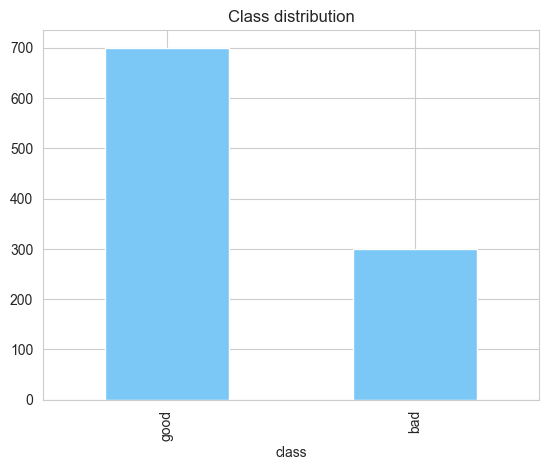

In [10]:
creditData['class'].value_counts().plot(kind='bar', title='Class distribution', xlabel='class',color='#7BC8F6')


### Numeric variables

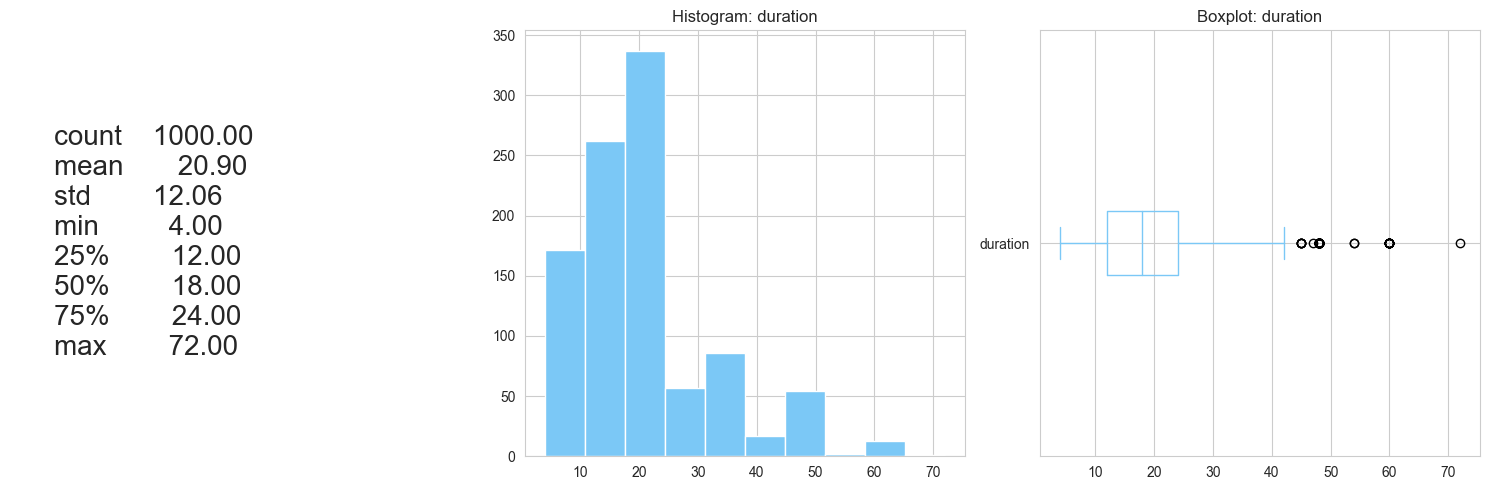

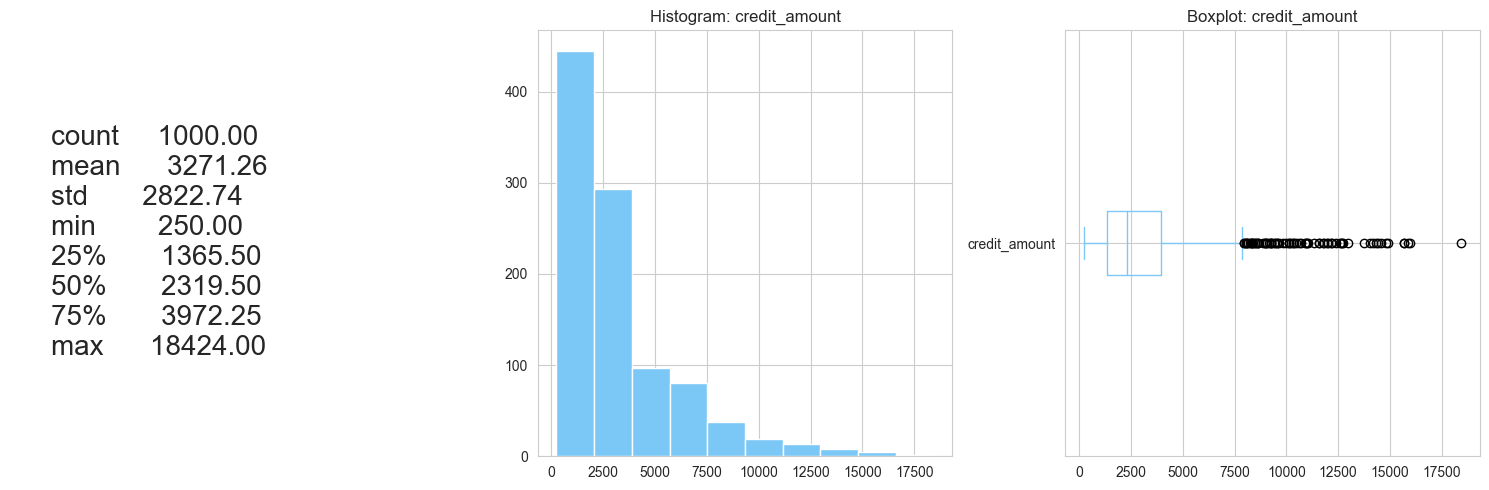

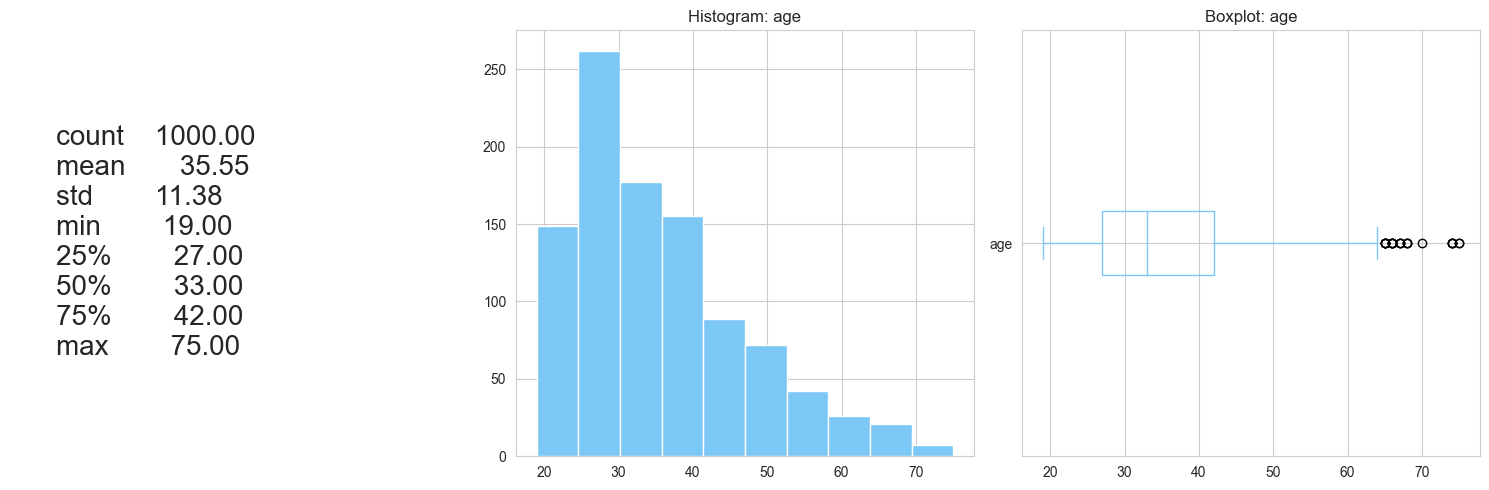

In [11]:
lst= ['duration','credit_amount','age']

for i in lst:
    plot_numeric_dis(i)
    print("\n")
    print("\n")
    

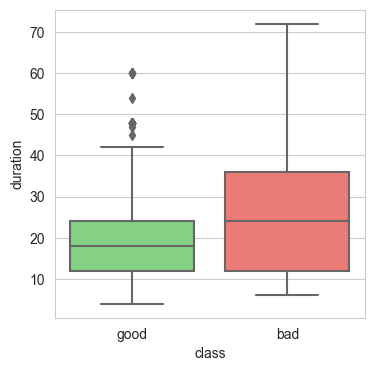

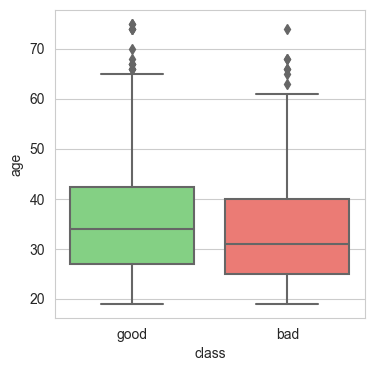

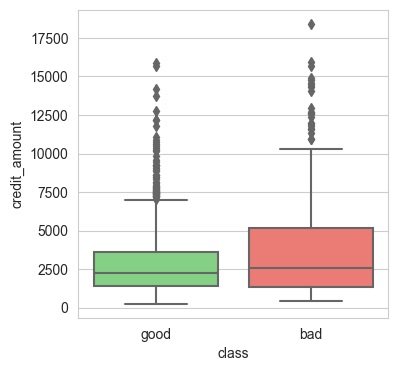

In [12]:
lst = ['duration','age','credit_amount']
for i in lst: 
    box_func(i)

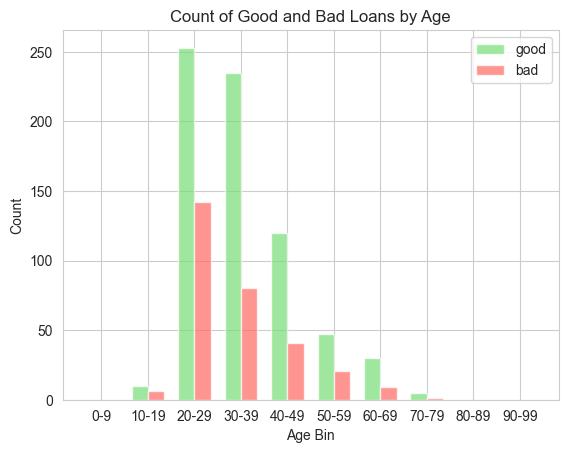

In [13]:
bins = range(0, 101, 10)
labels = ['{}-{}'.format(b, b+9) for b in bins[:-1]]
df = creditData[['age', 'class']]

# Add a column with the age bin
df['age_bin'] = pd.cut(creditData['age'], bins=bins, labels=labels)

# Group by age bin and class, and count the number of rows
count_by_age = df.groupby(['age_bin', 'class']).size().reset_index(name='count')

good = count_by_age[count_by_age['class'] == 'good']
bad = count_by_age[count_by_age['class'] == 'bad']

fig, ax = plt.subplots()

# Define the width of the bars
width = 0.35

# Plot the bars for the count of "good"
x1 = np.arange(len(good))
y1 = good['count']
ax.bar(x1 - width/2, y1, width, color= '#77DD77', label='good', alpha=0.7)

# Plot the bars for the count of "bad"
x2 = np.arange(len(bad))
y2 = bad['count']
ax.bar(x2 + width/2, y2, width, color='#FF6961', label='bad', alpha=0.7)

# Set the labels and title
ax.set_xlabel('Age Bin')
ax.set_ylabel('Count')
ax.set_title('Count of Good and Bad Loans by Age')

# Set the x-tick labels to the age bins
ax.set_xticks(x1)
ax.set_xticklabels(good['age_bin'])

# Add a legend
ax.legend()

# Display the chart
plt.show()

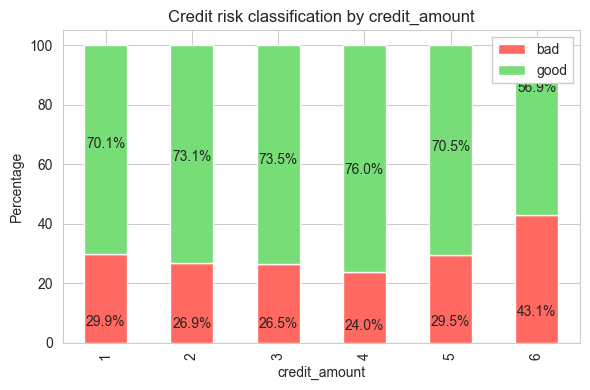

class bin   bad  good              range
0       1  30.0  70.0  (249.999, 1203.5]
1       2  27.0  73.0   (1203.5, 1554.0]
2       3  27.0  73.0   (1554.0, 2319.5]
3       4  24.0  76.0   (2319.5, 3368.0]
4       5  30.0  70.0   (3368.0, 5509.0]
5       6  43.0  57.0  (5509.0, 18424.0]


In [14]:
category_by_numery("credit_amount")

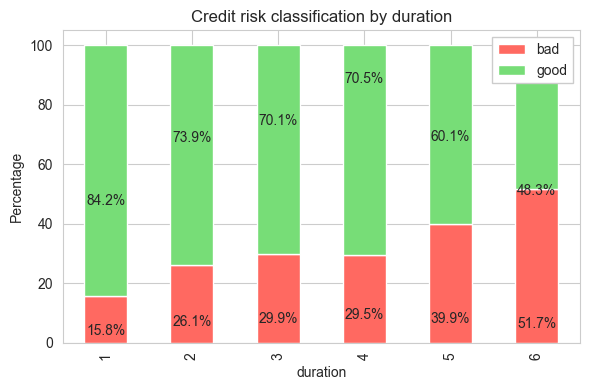

class bin   bad  good          range
0       1  16.0  84.0  (3.999, 10.0]
1       2  26.0  74.0   (10.0, 12.0]
2       3  30.0  70.0   (12.0, 18.0]
3       4  29.0  71.0   (18.0, 24.0]
4       5  40.0  60.0   (24.0, 36.0]
5       6  52.0  48.0   (36.0, 72.0]


In [15]:
category_by_numery("duration")

### Categorical variables

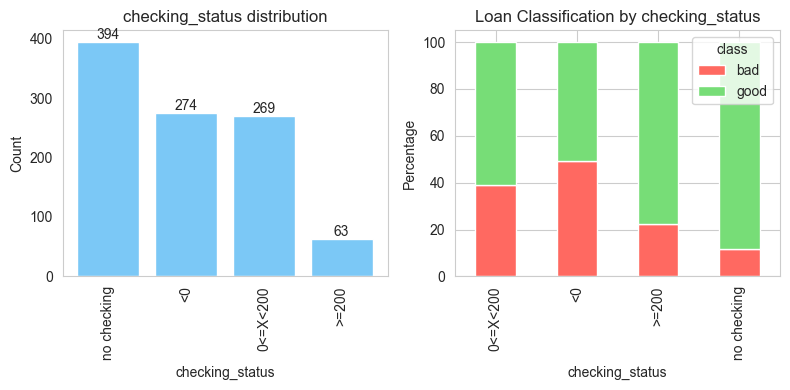

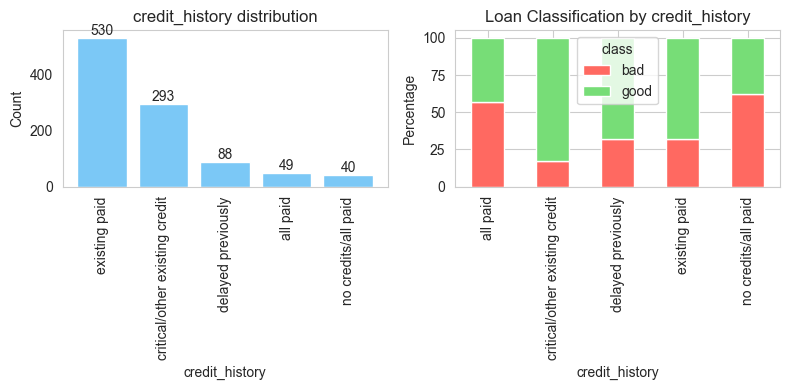

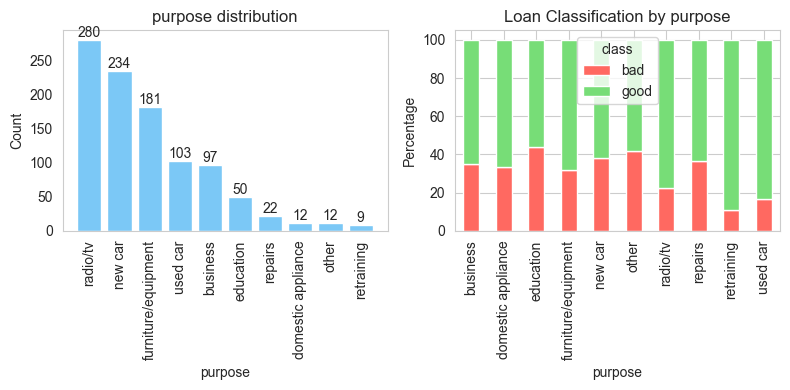

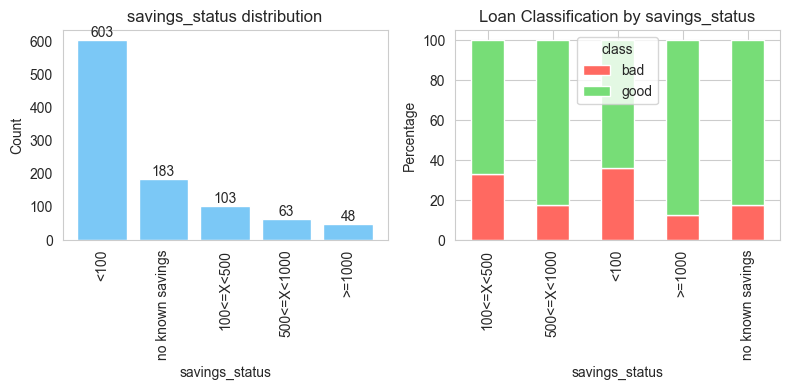

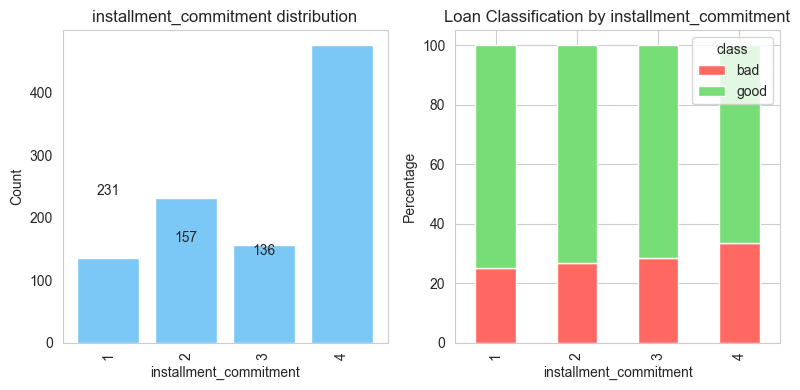

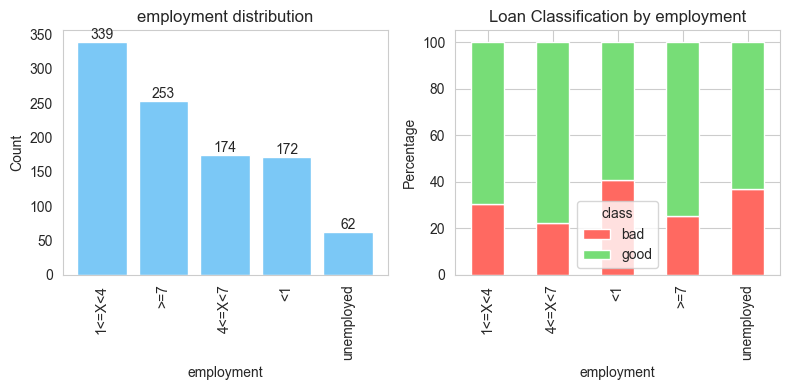

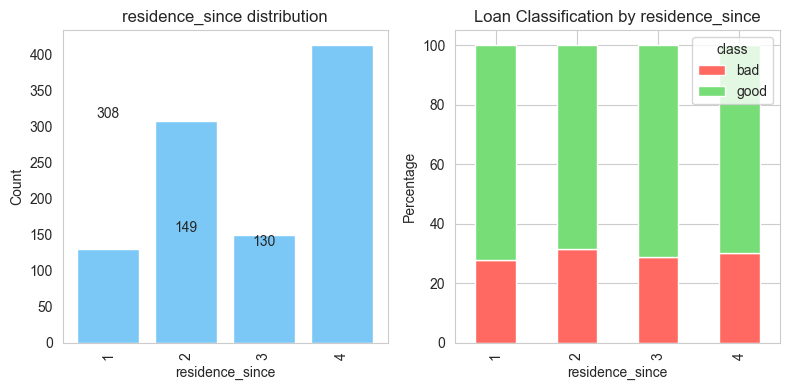

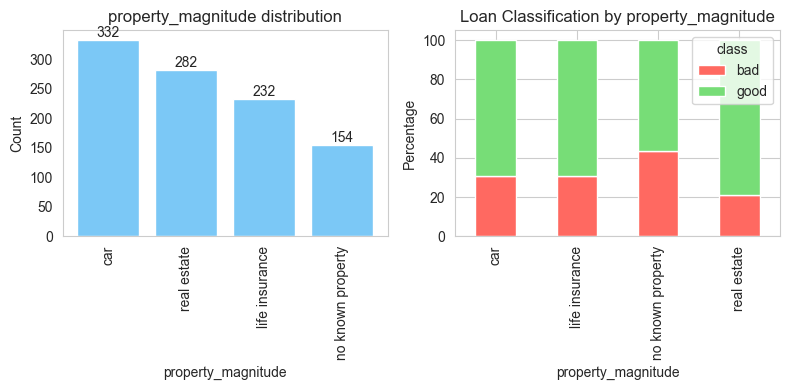

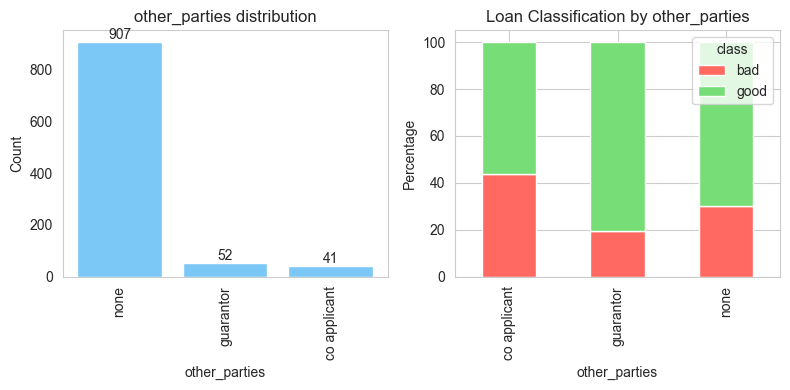

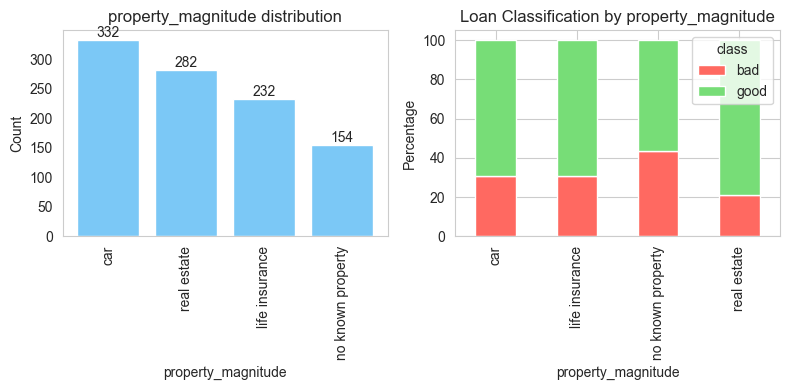

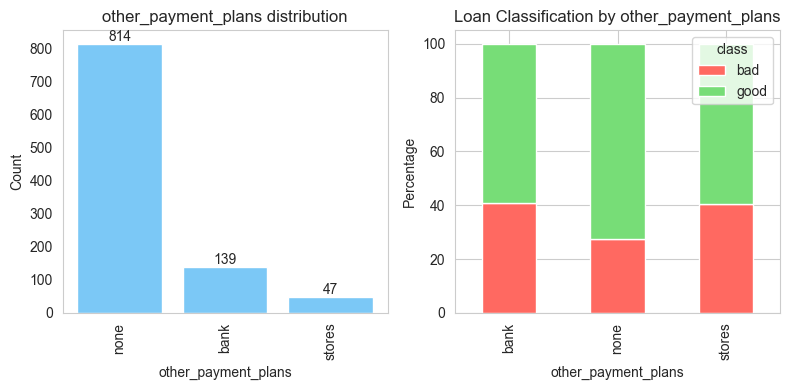

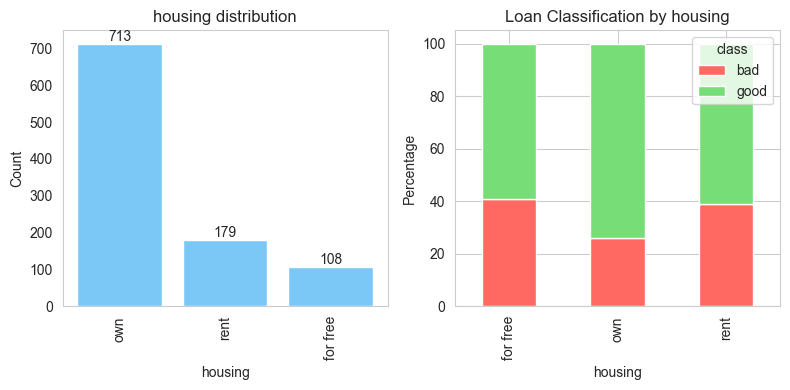

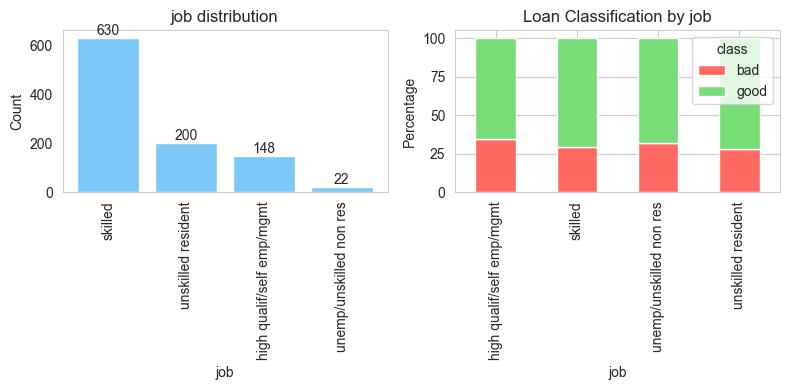

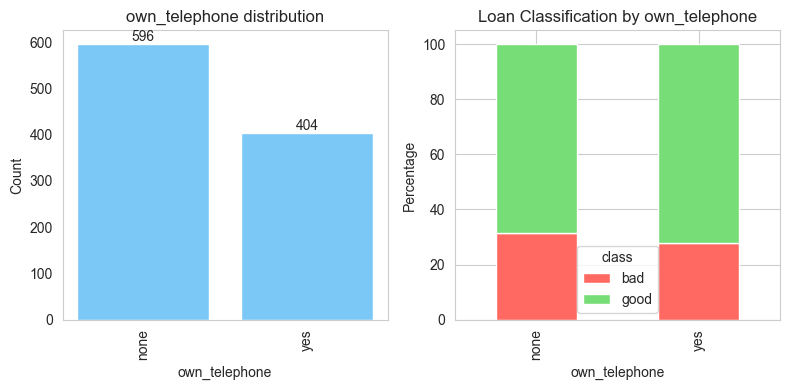

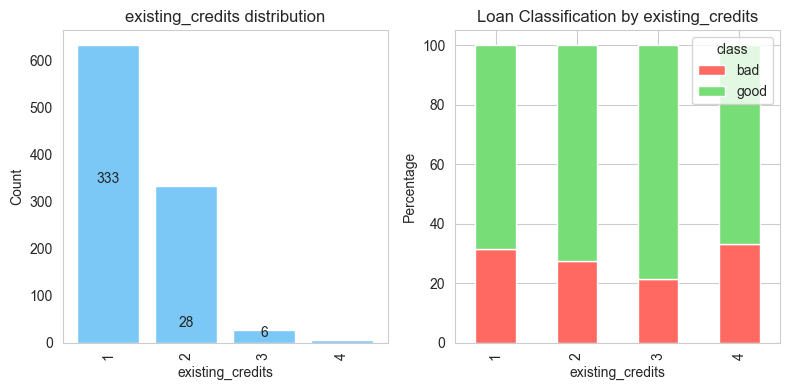

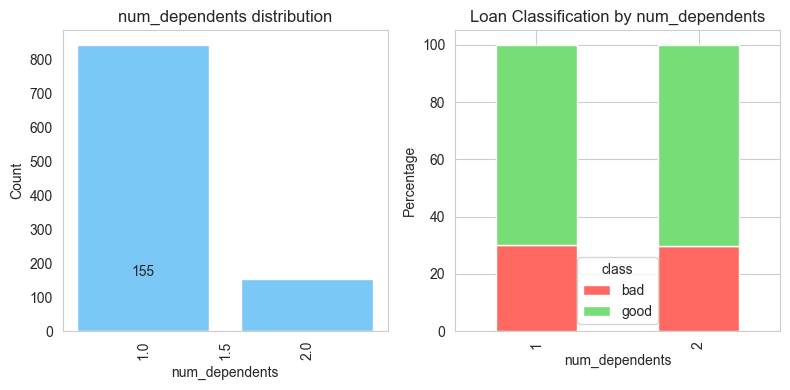

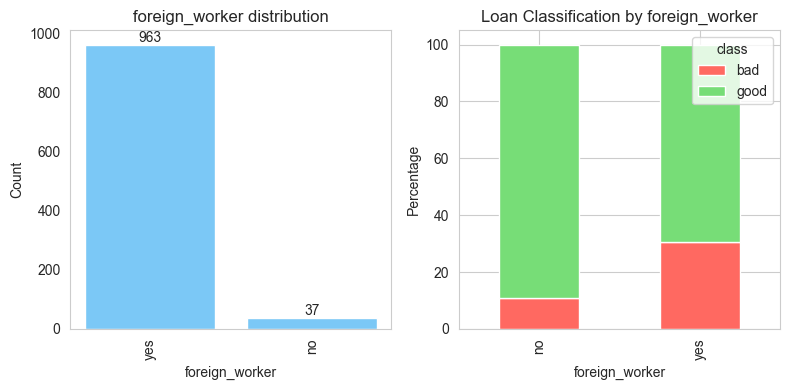

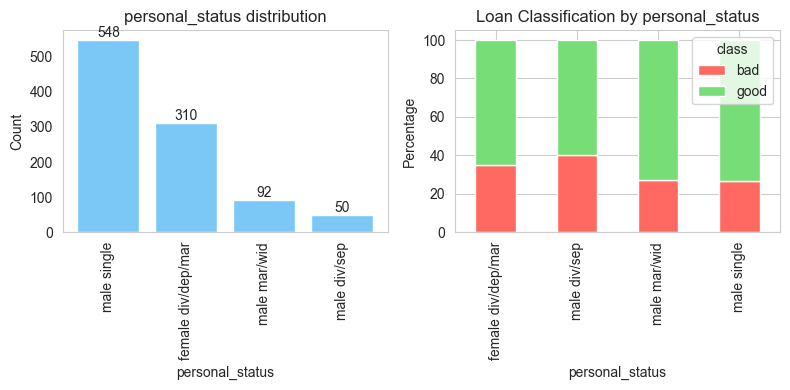

In [16]:
lst= ['checking_status', 'credit_history', 'purpose','savings_status','installment_commitment','employment','residence_since','property_magnitude','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','existing_credits','num_dependents','foreign_worker','personal_status']

for i in lst:
    categorical_dis(i)
    print("\n")
    print("\n")
    

divide column in to male and female

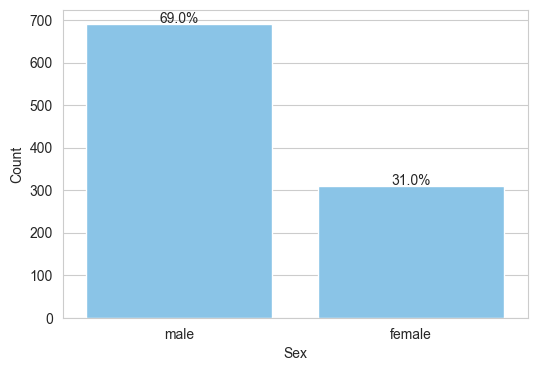

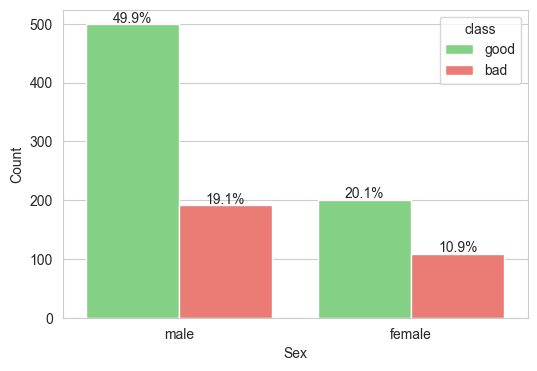

In [17]:
sex_df=creditData[['personal_status','class']]
sex_df[['sex', 'status']] = sex_df['personal_status'].str.split(' ', 1, expand=True)
# Drop the original column
sex_df.drop('personal_status', axis=1, inplace=True)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='sex',  data=sex_df,color='#7BC8F6')  # Set color palette
ax.set(ylabel='Count', xlabel='Sex')
total = len(sex_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:.1f}%'.format(height/total*100), ha="center")
plt.show()

plt.figure(figsize=(6,4))
ax = sns.countplot(x='sex', hue='class', data=sex_df, palette=[ '#77DD77','#FF6961'])  # Set color palette
ax.set(ylabel='Count', xlabel='Sex')
total = len(sex_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:.1f}%'.format(height/total*100), ha="center")
plt.show()


#  

## Organize and preprocess the data

In [18]:
# Splitting 'personal_status' column into 'gender' column 'status' column  

creditData[['gender', 'status']] = creditData['personal_status'].str.split(' ', 1, expand=True)
creditData.drop('personal_status', axis='columns', inplace=True)

In [19]:
# create 10-year age bins
bins = range(10,90,10)
labels = ['{}-{}'.format(b, b+9) for b in bins[:-1]]
creditData['age_bin'] = pd.cut(creditData['age'], bins=bins, labels=labels)
creditData.drop('age',axis=1,inplace = True)

creditData['age_bin'].unique()

['60-69', '20-29', '40-49', '50-59', '30-39', '10-19', '70-79']
Categories (7, object): ['10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [20]:
# Convert object type to category type

object_cols = ['age_bin','checking_status', 'credit_history', 'purpose','savings_status','employment','property_magnitude','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class','gender','status']
for col in object_cols:
    creditData[col] = creditData[col].astype('category')
    


In [21]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   other_parties           1000 non-null   category
 9   residence_since         1000 non-null   int64   
 10  property_magnitude      1000 non-null   category
 11  other_payment_plans     1000 non-null   category
 12  housing                 1000 non-null   category
 13  existing_credits        1000 non-null   int64   
 14  job                     1

In [22]:
# Convert binary variable into 1\0 values
creditData = creditData.replace({'foreign_worker': {'yes': 1,'no': 0}})
creditData = creditData.replace({'class': {'good': 1,'bad': 0}})
creditData = creditData.replace({'own_telephone': {'yes': 1,'none': 0}})
creditData = creditData.replace({'gender': {'female': 1,'male': 0}})

In [23]:
# apply one-hot encoding to the categorical columns

cat_cols =  ['checking_status', 'credit_history', 'purpose','savings_status','employment','other_parties','property_magnitude','other_payment_plans','housing','job','status','age_bin']
creditData = pd.get_dummies(creditData, columns=cat_cols)

# print the resulting DataFrame
creditData.head()

,duration,credit_amount,installment_commitment,residence_since,existing_credits,num_dependents,own_telephone,foreign_worker,class,gender,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,status_div/dep/mar,status_div/sep,status_mar/wid,status_single,age_bin_10-19,age_bin_20-29,age_bin_30-39,age_bin_40-49,age_bin_50-59,age_bin_60-69,age_bin_70-79
0,6,1169,4,4,2,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,48,5951,2,2,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,12,2096,2,3,1,2,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,42,7882,2,4,1,2,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,24,4870,3,4,2,2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [24]:
# Move the 'class' column to the end of the dataframe
creditData = creditData[[col for col in creditData if col != 'class'] + ['class']]

In [25]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 67 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   duration                                       1000 non-null   int64   
 1   credit_amount                                  1000 non-null   int64   
 2   installment_commitment                         1000 non-null   int64   
 3   residence_since                                1000 non-null   int64   
 4   existing_credits                               1000 non-null   int64   
 5   num_dependents                                 1000 non-null   int64   
 6   own_telephone                                  1000 non-null   category
 7   foreign_worker                                 1000 non-null   category
 8   gender                                         1000 non-null   category
 9   checking_status_0<=X<200                  

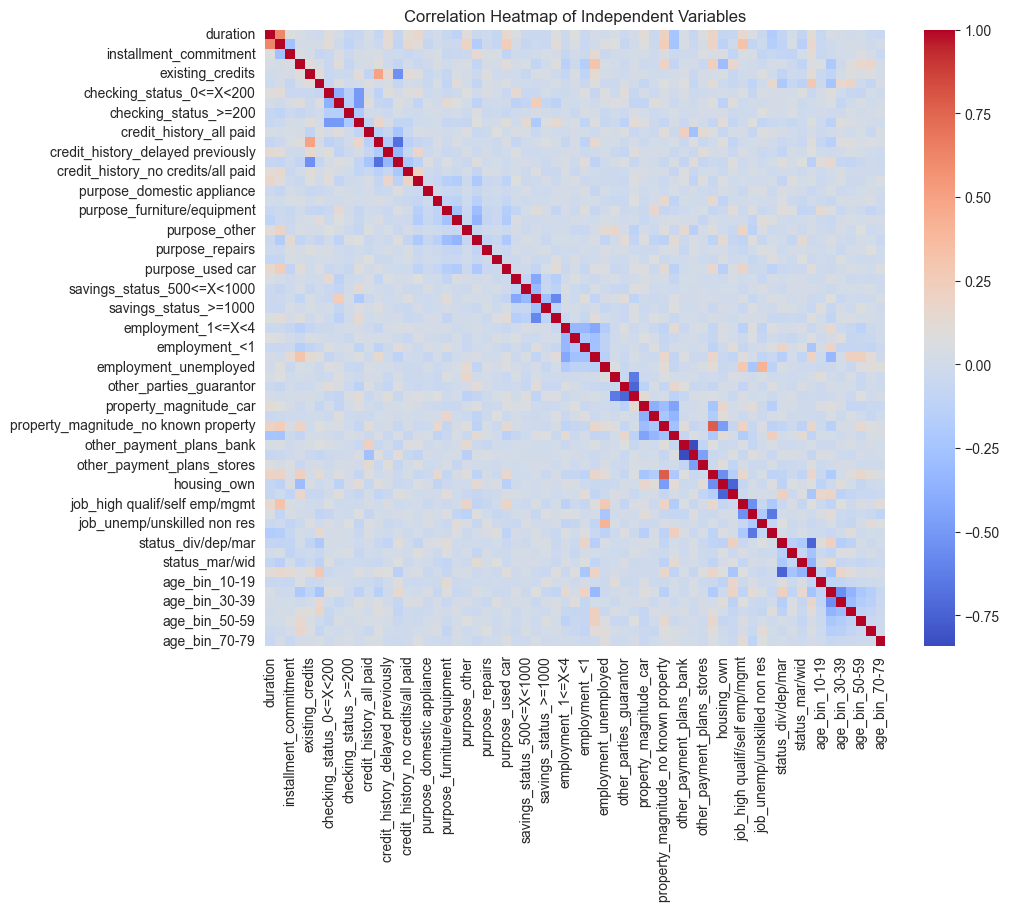

There are no highly correlated features.


In [26]:
# Calculate the correlation matrix of the independent variables
corr_matrix = creditData.iloc[:, :-1].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Independent Variables')
plt.show()



# print the features that are correlated with a threshold of 0.85 and above or -0.85 and below

threshold = 0.85

highly_correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        correlation = corr_matrix.iloc[i, j]
        if correlation >= threshold or correlation <= -threshold:
            feature_i = corr_matrix.columns[i]
            feature_j = corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j, correlation))

            
# Check if the list of highly correlated features is empty
if not highly_correlated_features:
    print("There are no highly correlated features.")
else:
    # Print the highly correlated features
    for feature_i, feature_j, correlation in highly_correlated_features:
        print(f"{feature_i} and {feature_j} are highly correlated ({correlation})")

Dependent and Independent variables

In [27]:
X = creditData.iloc[:, :-1].values # The independent variables
y = creditData.iloc[:,-1].values # The dependet 'class' good or bad variable

Training and testing sets 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0, stratify = y)

In [29]:
X_train

array([[  24, 1246,    4, ...,    0,    0,    0],
       [  12,  900,    4, ...,    0,    0,    0],
       [   6,  672,    1, ...,    1,    0,    0],
       ...,
       [  24, 2064,    3, ...,    0,    0,    0],
       [  30, 4280,    4, ...,    0,    0,    0],
       [  12,  609,    4, ...,    0,    0,    0]], dtype=int64)

Standardization

In [30]:
scaler = StandardScaler()
scaler = StandardScaler().fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[ 0.75761279, -0.32986523,  0.91883747, ..., -0.26636529,
        -0.20742414, -0.07930516],
       [-0.74364277, -0.69151053,  0.91883747, ..., -0.26636529,
        -0.20742414, -0.07930516],
       [ 1.75844982,  1.09652442, -0.86531296, ..., -0.26636529,
        -0.20742414, -0.07930516],
       ...,
       [-0.24322425, -0.29597225,  0.91883747, ..., -0.26636529,
        -0.20742414, -0.07930516],
       [-0.49343351,  0.50808461,  0.02676226, ..., -0.26636529,
        -0.20742414, -0.07930516],
       [ 0.25719427, -0.6511274 ,  0.91883747, ..., -0.26636529,
        -0.20742414, -0.07930516]])

In [31]:
# Upsampling Minority Class

# apply SMOTE to the training data
oversample = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


In [32]:
pd.Series(y_train).value_counts()

1    560
0    240
dtype: int64

<AxesSubplot: title={'center': 'Class train distribution'}, xlabel='class'>

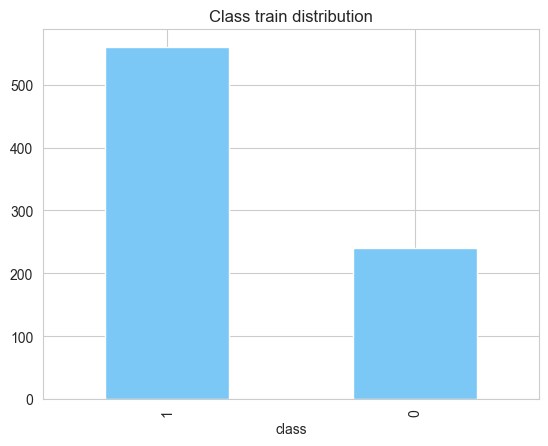

In [33]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class train distribution', xlabel='class',color='#7BC8F6')


In [34]:
pd.Series(y_train_resampled).value_counts()

0    560
1    560
dtype: int64

<AxesSubplot: title={'center': 'Class train distribution after applying SMOTE'}, xlabel='class'>

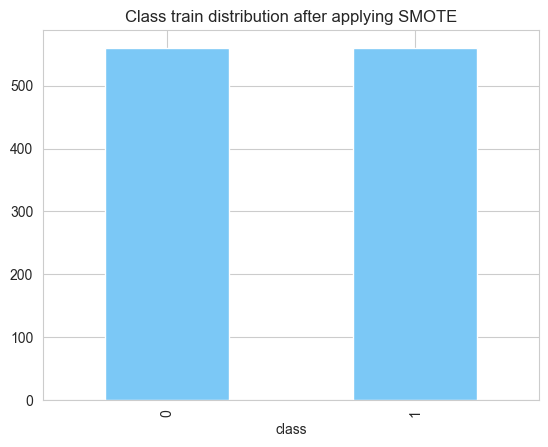

In [35]:
pd.Series(y_train_resampled).value_counts().plot(kind='bar', title='Class train distribution after applying SMOTE', xlabel='class',color='#7BC8F6')


In [36]:
def models_train(model, param_grid, X_train_resampled, y_train_resampled, X_test):
    
    # Use GridSearchCV to search over the hyperparameter grid
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
    
    # Fit the grid search to the training data
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Get the best estimator
    best_est = grid_search.best_estimator_
        
    # Predict using the best estimator
    y_pred = best_est.predict(X_test)
        
    # Print the best parameter and score
    print("Best parameter: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_ , "\n")
     
    return y_pred, best_est

def plot_feature_importance(model, model_name):
    importances = model.feature_importances_

    # Sort the feature importances in descending order
    sorted_indices = importances.argsort()[::-1]
    sorted_importances = importances[sorted_indices]

    # Get the names of the features
    feature_names = creditData.iloc[:, :-1].columns[sorted_indices][:10]

    # Plot the feature importances
    plt.figure(figsize=(7, 5))
    plt.bar(range(len(sorted_importances[:10])), sorted_importances[:10], tick_label=feature_names,color='#7BC8F6')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title( model_name + ' Feature Importance')
    plt.xticks(rotation=90)
    plt.show()
    
    
    
def evaluation_metrics(y_test, y_pred, best_est, model_name):
    # Calculate precision, recall, and f1-score
    print("\nClassification Report:\n", classification_report(y_test, y_pred), "\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


    

### Decision Tree

In [37]:
# Create a decision tree classifier
classifier_dt = DecisionTreeClassifier(random_state=0)  

# Set up a grid of hyperparameter values to search over
param_grid = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

y_pred, best_est =  models_train(classifier_dt, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 5}
Best score:  0.7410714285714286 



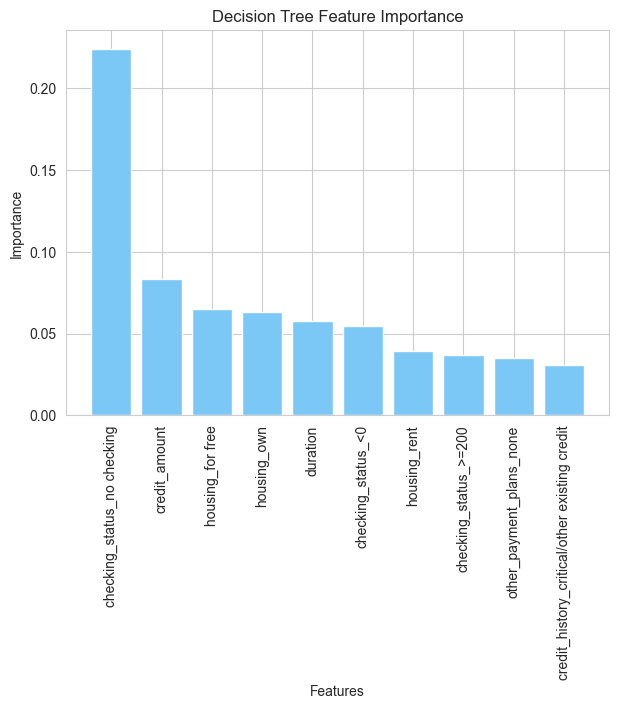

In [38]:
plot_feature_importance(best_est,'Decision Tree')


Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.63      0.54        60
           1       0.81      0.69      0.74       140

    accuracy                           0.67       200
   macro avg       0.64      0.66      0.64       200
weighted avg       0.71      0.67      0.68       200
 



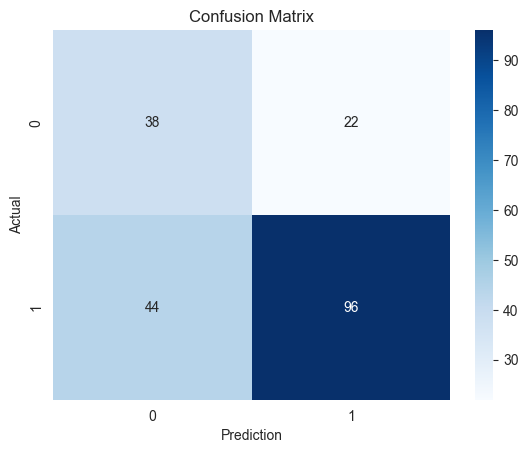

In [39]:
# Evaluating the results of the model
evaluation_metrics(y_test, y_pred, best_est, 'Decision Tree')

### Random Forest

In [40]:
# Create a random forest classifier
classifier_rf = RandomForestClassifier(random_state=0)

# Set up a grid of hyperparameter values to search over
param_grid = {'n_estimators': [100, 300, 500, 1000],    
              'max_depth': [3, 4, 5, 6, 7, 9, 11],          
              'min_samples_split':  [2, 3, 4, 5, 6, 7],     
              'min_samples_leaf': [1, 2, 4, 6]        
              }

y_pred, best_est =  models_train(classifier_rf, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.8044642857142857 



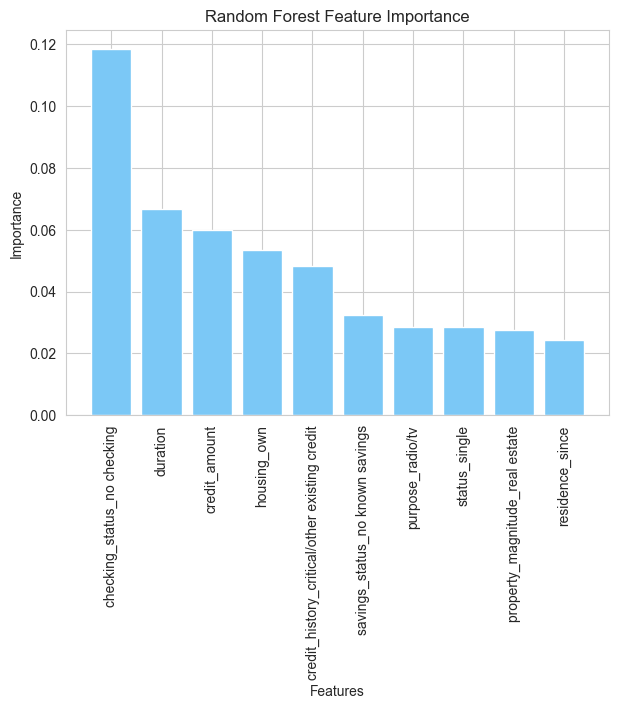

In [41]:
plot_feature_importance(best_est,'Random Forest')


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.57      0.62        60
           1       0.83      0.89      0.86       140

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200
 



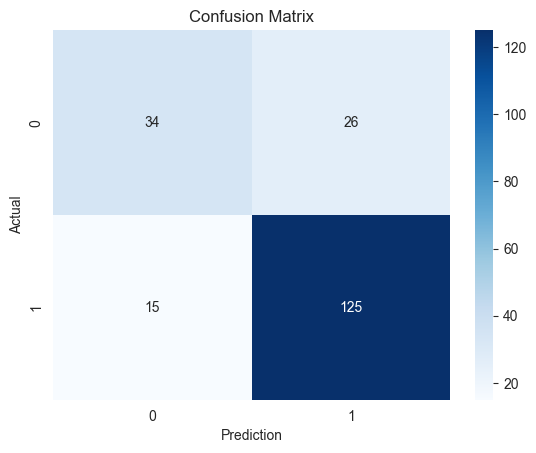

In [42]:
# Evaluating the results of the model
evaluation_metrics(y_test, y_pred, best_est, 'Random Forest')

### KNN Classifier

In [43]:
# Create a kNN classifier
classifier_knn = KNeighborsClassifier()

# Set up a grid of hyperparameter values to search over
param_grid = {'n_neighbors': [3, 5, 7],           
              'weights': ['uniform', 'distance'],  
              'p': [1, 2]                          
              }

y_pred, best_est =  models_train(classifier_knn, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best score:  0.6892857142857143 




Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.65      0.49        60
           1       0.79      0.57      0.66       140

    accuracy                           0.59       200
   macro avg       0.59      0.61      0.58       200
weighted avg       0.67      0.59      0.61       200
 



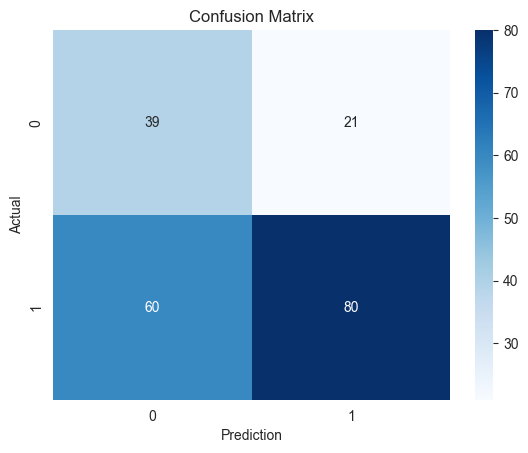

In [44]:
# Evaluating the results of the model
evaluation_metrics(y_test, y_pred, best_est, 'KNN')

### Support Vector Machine - SVM

In [45]:
# Create a SVC (Support Vector Classification) classifier
classifier_svm = SVC()

# Set up a grid of hyperparameter values to search over
param_grid = { 'C': [0.1, 1, 10],              
              'gamma': [0.1, 1, 10]           
              }

y_pred, best_est =  models_train(classifier_svm, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'C': 10, 'gamma': 0.1}
Best score:  0.6625 




Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.12      0.17        60
           1       0.71      0.91      0.79       140

    accuracy                           0.67       200
   macro avg       0.53      0.51      0.48       200
weighted avg       0.60      0.67      0.61       200
 



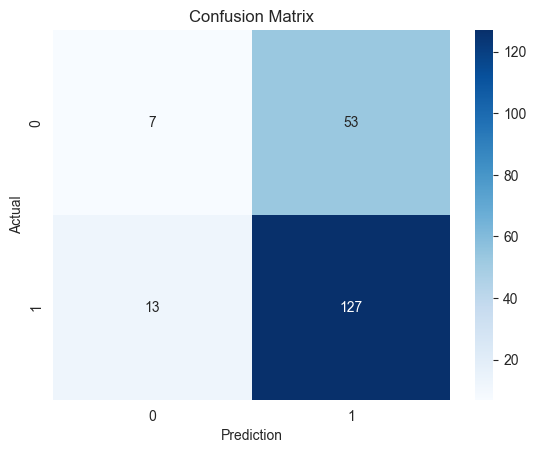

In [46]:
# Evaluating the results of the model
evaluation_metrics(y_test, y_pred, best_est, 'SVM')

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression classifier
classifier_lr = LogisticRegression(random_state=0)

# Set up a grid of hyperparameter values to search over
param_grid = { 'C': [0.1, 1, 10],                   
               'penalty': ['l1', 'l2'],                  
             }

y_pred, best_est =  models_train(classifier_lr, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'C': 10, 'penalty': 'l2'}
Best score:  0.7928571428571429 




Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59        60
           1       0.82      0.83      0.83       140

    accuracy                           0.76       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.75      0.76      0.75       200
 



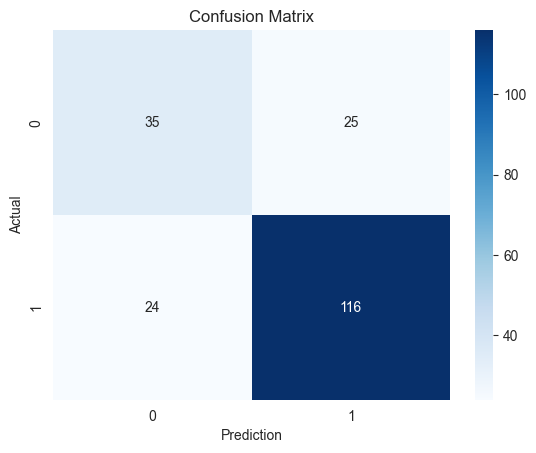

In [48]:
evaluation_metrics(y_test, y_pred, best_est, 'Logistic Regression')

### XGBoost

In [49]:
# Create an XGBoost classifier object
classifier_xgb = xgb.XGBClassifier()

# Set up a grid of hyperparameter values to search over
param_grid = { 'learning_rate': [0.1, 0.01, 0.001],                 
               'n_estimators': [100, 500, 1000],                    
               'max_depth': [3, 4, 5, 6, 7, 9, 11],                                                        
              }

y_pred, best_est =  models_train(classifier_xgb, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 500}
Best score:  0.8044642857142857 



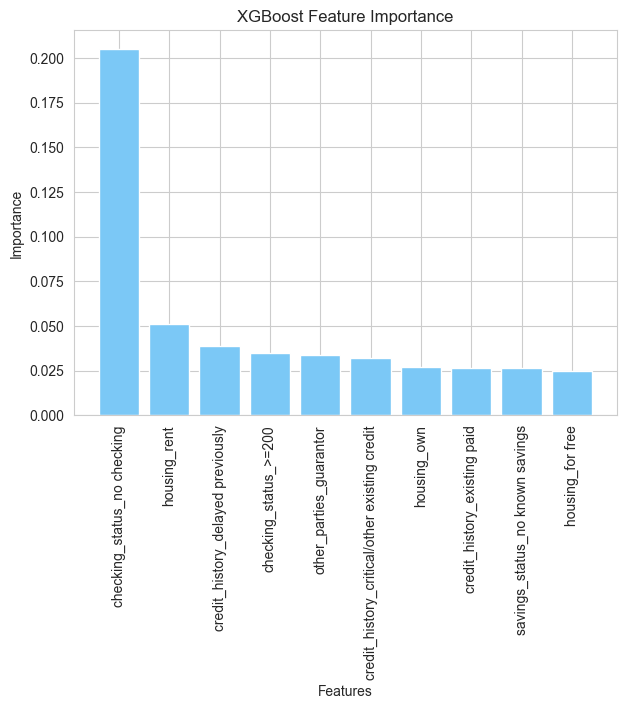

In [50]:
plot_feature_importance(best_est,'XGBoost')


Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        60
           1       0.80      0.84      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.73      0.74      0.73       200
 



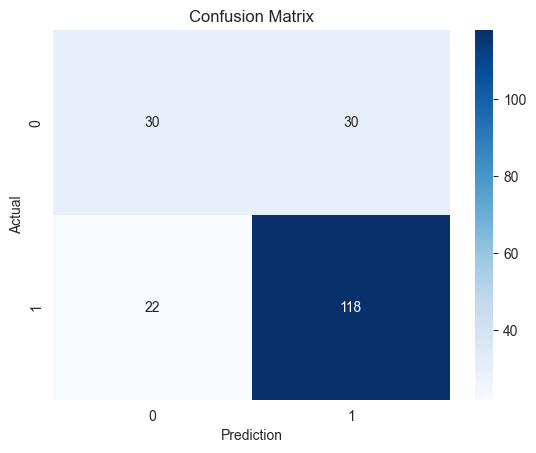

In [51]:
evaluation_metrics(y_test, y_pred, best_est, 'XGBoost')

### CatBoost


In [52]:
#!pip install catboost
from catboost import CatBoostClassifier

# Create a CatBoost classifier object
classifier_cat = CatBoostClassifier(verbose=False)

# Set up a grid of hyperparameter values to search over
param_grid = { 'depth': [3, 4, 5, 6, 7, 9, 11], 
               'learning_rate': [0.1, 0.01, 0.001],  
               'iterations': [100, 200, 300]  
              }

y_pred, best_est =  models_train(classifier_cat, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'depth': 4, 'iterations': 300, 'learning_rate': 0.1}
Best score:  0.8160714285714287 



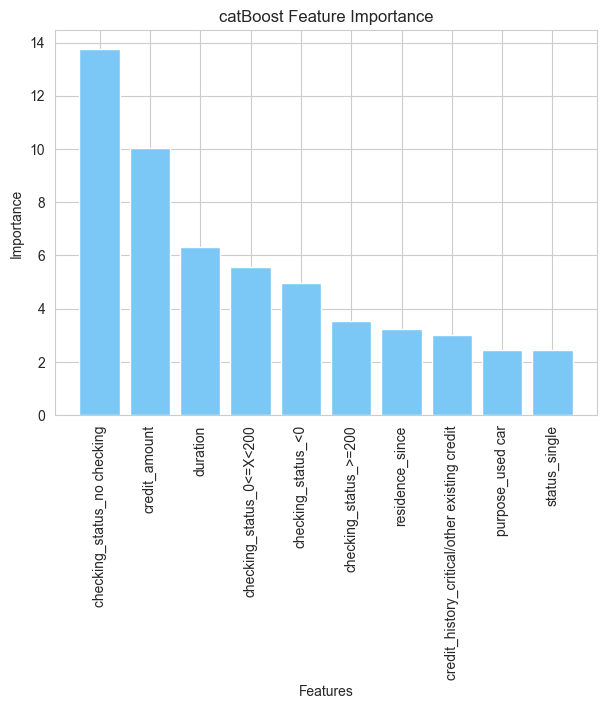

In [53]:
plot_feature_importance(best_est,'catBoost')


Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.53      0.56        60
           1       0.81      0.84      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.69       200
weighted avg       0.74      0.74      0.74       200
 



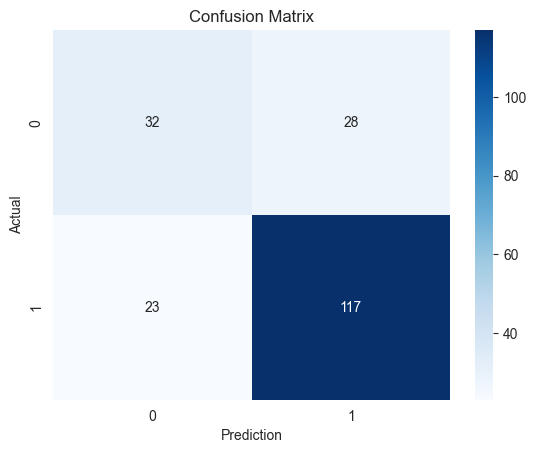

In [54]:
evaluation_metrics(y_test, y_pred, best_est, 'catBoost')